# Semester Project 

In [90]:
# import needed modules
import pandas as pd
import numpy as np
import datetime as dt
from datetime import time
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [91]:
# load in & examine the data!
dog_park = pd.read_csv("dogparkdata_2012to2018.csv")
dog_park.head()

,Unnamed: 0,names,times,valid
0,0,bdjdaabeacjjbibbafjcjdjfaibib,1/1/2012 8:31:46AM,Valid Access
1,1,abjejijgjejjbiagjebib,1/1/2012 10:27:20AM,Valid Access
2,2,abjejijgjejjbiagjebib,1/1/2012 10:52:26AM,Valid Access
3,3,jeaajfaijijdjjbijdjcbdjcbbbbaabib,1/1/2012 10:52:48AM,Valid Access
4,4,jeaajfaijijdjjbijdjcbdjcbbbbaabib,1/1/2012 11:19:56AM,Valid Access


In [92]:
# make the data more readable
# make dataframe into an array & split based on year
dog_park_array = np.array(dog_park)
data_2012 = dog_park_array[0:10891]
data_2013 = dog_park_array[10891:20945]
data_2014 = dog_park_array[20945: 32605]
data_2015 = dog_park_array[32605: 49340]
data_2016 = dog_park_array[49340:70150]
data_2017 = dog_park_array[70150:87560]
data_2018 = dog_park_array[87560:110066]

In [93]:
# deal with the yucky date/time string
# this function will create an array with the correct times in military time in the format [hour, minute, second]
def correct_time(array):
    correct_times = []
    for i in range(0,len(array)):
        date_time = array[i][2] 
        time = date_time[-10:-2]
        am_pm = date_time[-2]
        minute = int(time[3:5])
        second = int(time[6:8])
        hour = int(time[0:2]) 
        if am_pm == 'A' and hour != 12:
            correct_times.append([hour, minute,second])
        elif am_pm == 'P'and hour != 12:
            hour += 12
            correct_times.append([hour, minute, second])
        elif am_pm == 'A' and hour == 12:
            hour = 0
            correct_times.append([hour, minute, second])
        elif am_pm == 'P' and hour == 12:
            hour = 12
            correct_times.append([hour,minute,second])
    return(correct_times)    

In [94]:
# dealing with the yucky date/time string continued
# this function will create an array with the correct date in the format [month, day, year]
def correct_date(array):
    correct_dates = []
    for i in range(0, len(array)):
        date_time = array[i][2]
        date = date_time[0:10]
        find_month = date.partition('/')
        month = int(find_month[0])
        find_day = find_month[2].partition('/')
        day = int(find_day[0])
        year = int(find_day[2])
        correct_dates.append([month,day,year])
    return(correct_dates)

In [108]:
times_2012 = correct_time(data_2012)
dates_2012 = correct_date(data_2012)
times_2013 = correct_time(data_2013)
dates_2013 = correct_date(data_2013)
times_2014 = correct_time(data_2014)
dates_2014 = correct_date(data_2014)
times_2015 = correct_time(data_2015)
dates_2015 = correct_date(data_2015)
times_2016 = correct_time(data_2016)
dates_2016 = correct_date(data_2016)
times_2017 = correct_time(data_2017)
dates_2017 = correct_date(data_2017)
times_2018 = correct_time(data_2018)
dates_2018 = correct_date(data_2018)

[[1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 1, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 2, 2012],
 [1, 3, 2012],
 [1, 3, 2012],
 [1, 3, 2012],
 [1, 3, 2012],
 [1, 3, 2012],
 [1, 3, 2012],
 [1, 3, 2012],
 [1, 3, 2012],
 [1, 3, 2012],
 [1, 3, 2012],
 [1, 3, 2012],
 [1, 3, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 2012],
 [1, 4, 20

In [95]:
# now we need to get into the real stuff, finding the times that people were at the park
# first, we will define a function that determines what indices have the date we want

def find_indices(month,day,year,date_array):
    begin = date_array.index([month,day,year])
    end = date_array.index([month,day+1,year]) 
    return(begin,end)

#test!
find_indices(2,14,2017,dates_2017)
#this will return 2 numbers, the first one is the first entry of 2/14/2017, and the second one is the last entry

(1846, 1893)

Text(0,0.5,'Total Scans')

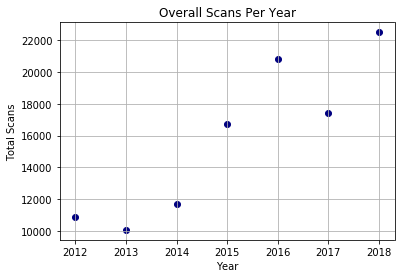

In [96]:
#Modeling number of scans per year
scans_per_year = [len(dates_2012),len(dates_2013),len(dates_2014),len(dates_2015), len(dates_2016),len(dates_2017),len(dates_2018)]
year = [2012,2013,2014,2015,2016,2017,2018]
plt.scatter(year,scans_per_year,color = "navy")
plt.grid()
plt.title("Overall Scans Per Year")
plt.xlabel("Year")
plt.ylabel("Total Scans")

In [58]:
def unique(dates):
    unique_dates = []
    for date in dates:
        if date not in unique_dates:
            unique_dates.append(date)
    return unique_dates
            
unique_dates = unique(dates_2012)

In [63]:
def userid(array):
    ids = []
    for i in range (0,len(array)):
        name = array[i][1]
        ids.append(name)
        
    return ids
        

In [31]:
users_2012 = userid(data_2012)
users_2013 = userid(data_2013)
users_2014 = userid(data_2014)
users_2015 = userid(data_2015)
users_2016 = userid(data_2016)
users_2017 = userid(data_2017)
users_2018 = userid(data_2018)

In [84]:
def find_enter_exit_times(user_id, day_array, time_array):
    all_users = userid(day_array)
    indices = []
    for i in range(0,len(all_users)):
        if i == user_id:
            indices.append(i)
    return(indices)

[]

In [ ]:
    if len(indices) == 1:
        ent_exit = time_array[indices[0]]
        if ent_exit[1] >= 30:
            enter = [ent_exit[0],ent_exit[1]-30,ent_exit[2]]
            exit = [ent_exit[0]+1,60-ent_exit[1],ent_exit[2]]
        elif ent_exit[1] < 30:
            enter = [ent_exit[0]-1, 60 - ent_exit[1],ent_exit[2]]
            exit = [ent_exit[0],ent_exit[1] + 30, ent_exit[2]]
        return enter,exit    
    elif len(indices) == 2:
        enter = time_array[indices[0]]
        exit = time_array[indices[1]]
        return enter,exit
    else:
        return("there was an error")
    
    
    
def round_enter_exit_times(enter,exit):
    if enter[1] < 15:
        rounded_enter = enter[0]
    elif enter[1] >= 15 and enter[1] < 45:
        rounded_enter = enter[0]+.5
    elif enter[1] >= 45:
        rounded_enter = enter[0]+1
        
        
    if enter[1] < 15:
        rounded_exit = exit[0]
    elif enter[1] >= 15 and enter[1] < 45:
        rounded_exit = exit[0]+.5
    elif enter[1] >= 45: 
        rounded_exit = exit[0]+1  
     
    return(enter,exit,rounded_enter,rounded_exit)

In [86]:

#test!
find_indices(2,14,2017,dates_2017)
test_dates = dates_2017[1846:1893]
test_times = times_2017[1846:1893]
test_ids = userid(data_2017[1846:1893])
find_enter_exit_times('jhbeaeafaabfbibbjijgbejejfjjbiajaajdahabbijiadadjhbbjcbibgbbaajdacbidcbh', test_dates,test_times)

[]